<a href="https://colab.research.google.com/github/PranavPrakash28/AI_Projects/blob/main/Pranav_Prakash_Python%2BAI(Student_Exam_Marks_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDENT EXAM MARKS PREDICTION




In [ ]:
import numpy as np
import pandas as pd

### data pre processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_data.csv')

In [ ]:
df

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
0,1,95,15,88,1
1,2,85,10,76,1
2,3,75,6,64,1
3,4,60,4,55,0
4,5,90,12,82,1
5,6,55,3,48,0
6,7,70,8,67,1
7,8,80,9,74,1
8,9,50,2,43,0
9,10,65,5,59,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   StudentID       20 non-null     int64
 1   AttendanceRate  20 non-null     int64
 2   StudyTime       20 non-null     int64
 3   FinalExamScore  20 non-null     int64
 4   Pass/Fail       20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [ ]:
df.describe()

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,72.250000,7.700000,65.750000,0.600000
std,5.91608,16.855032,4.554928,16.166486,0.502625
min,1.00000,40.000000,1.000000,38.000000,0.000000
25%,5.75000,59.500000,4.000000,54.000000,0.000000
50%,10.50000,74.000000,7.000000,66.500000,1.000000
75%,15.25000,85.750000,10.500000,77.500000,1.000000
max,20.00000,96.000000,16.000000,91.000000,1.000000


In [ ]:
df.isnull().sum()

,0
StudentID,0
AttendanceRate,0
StudyTime,0
FinalExamScore,0
Pass/Fail,0


In [ ]:
df.columns

Index(['StudentID', 'AttendanceRate', 'StudyTime', 'FinalExamScore',
       'Pass/Fail'],
      dtype='object')

In [ ]:
df.shape

(20, 5)

In [ ]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
1,12
0,8


In [ ]:
x = df.drop(['Pass/Fail'],axis=1)

In [ ]:
y = df['Pass/Fail']

In [ ]:
y.head()

,Pass/Fail
0,1
1,1
2,1
3,0
4,1


In [ ]:
x.head()

,StudentID,AttendanceRate,StudyTime,FinalExamScore
0,1,95,15,88
1,2,85,10,76
2,3,75,6,64
3,4,60,4,55
4,5,90,12,82


## Linear Regression

### splitting data into training and testing chunks

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size= 0.3,random_state=65)

In [ ]:
train_x.head()

,StudentID,AttendanceRate,StudyTime,FinalExamScore
4,5,90,12,82
2,3,75,6,64
11,12,40,1,38
9,10,65,5,59
13,14,78,7,69


In [ ]:
train_y.head()

,Pass/Fail
4,1
2,1
11,0
9,0
13,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


model_lr = LinearRegression()
model_lr.fit(train_x,train_y)


y_pred_train_lr = model_lr.predict(train_x)
y_pred_test_lr = model_lr.predict(test_x)




train_mse_lr = mean_squared_error(train_y,y_pred_train_lr)
test_mse_lr = mean_squared_error(test_y,y_pred_test_lr)

In [ ]:
train_r2_lr = r2_score(train_y,y_pred_train_lr)
test_r2_lr = r2_score(test_y,y_pred_test_lr)

In [ ]:
print(train_mse_lr)
print(test_mse_lr)
print(train_r2_lr)
print(test_r2_lr)

0.061144034462888894
0.06643366692247618
0.7554238621484444
0.5216775981581716


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
0,1,95,15,88,1
1,2,85,10,76,1
2,3,75,6,64,1
3,4,60,4,55,0
4,5,90,12,82,1
5,6,55,3,48,0
6,7,70,8,67,1
7,8,80,9,74,1
8,9,50,2,43,0
9,10,65,5,59,0


## Data Visulaization

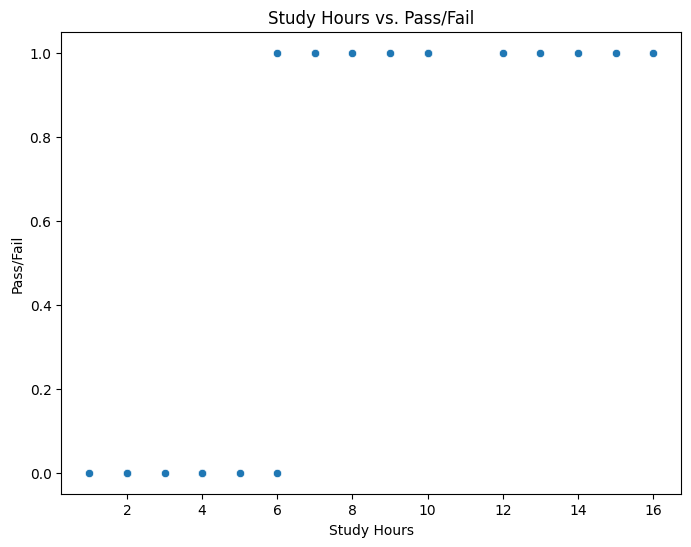

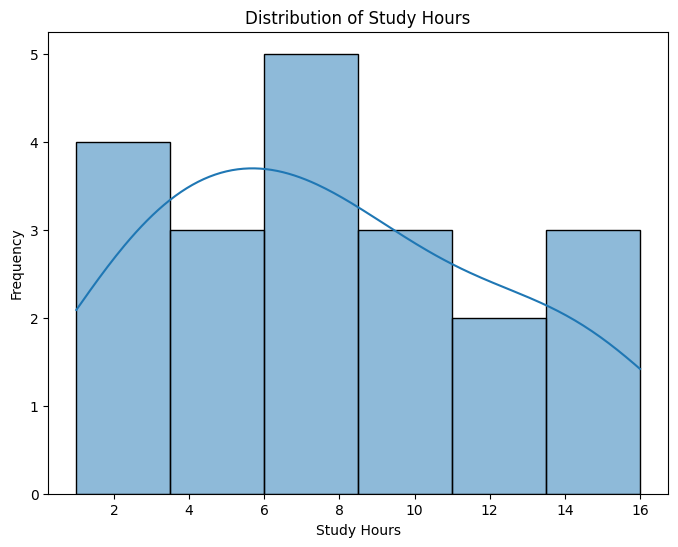

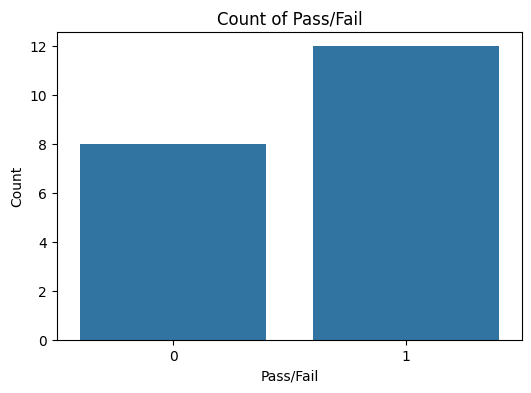

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='StudyTime', y='Pass/Fail', data=df)
plt.title('Study Hours vs. Pass/Fail')
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['StudyTime'], kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='Pass/Fail', data=df)
plt.title('Count of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter = 1000)

In [ ]:
model_lr.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_train = model_lr.predict(train_x)
y_pred_test = model_lr.predict(test_x)

In [ ]:
print(y_pred_test)

[1 1 0 1 1 1]


In [ ]:
print(y_pred_train)

[1 1 0 0 1 1 0 0 1 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_y, y_pred_test)
precision = precision_score(test_y, y_pred_test)
recall = recall_score(test_y, y_pred_test)
f1 = f1_score(test_y, y_pred_test)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


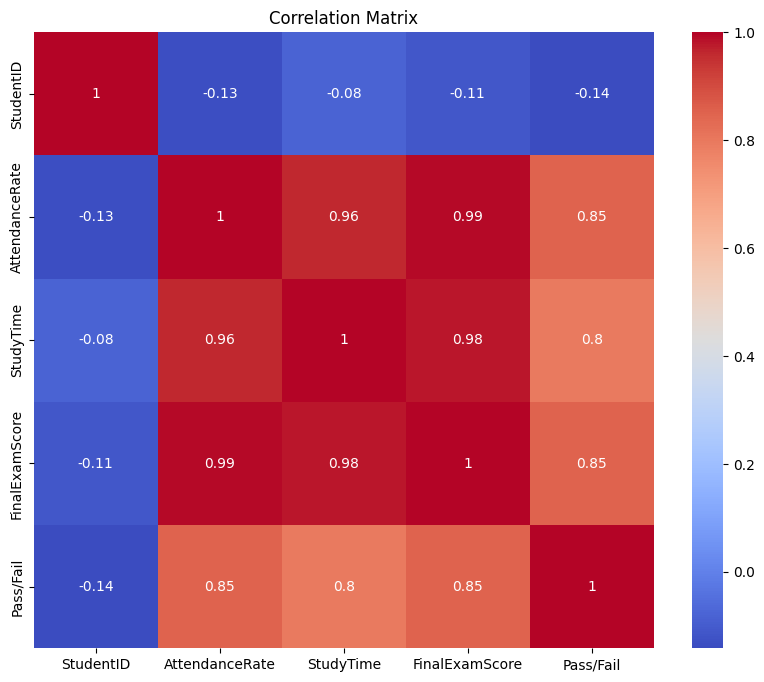

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# K-Means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
df.columns

Index(['StudentID', 'AttendanceRate', 'StudyTime', 'FinalExamScore',
       'Pass/Fail'],
      dtype='object')

In [ ]:
k = 2
model_kmeans = KMeans(n_clusters = k , random_state = 56)
columns_for_clustering = ['StudyTime', 'FinalExamScore']

In [ ]:
df_for_clustering = df[columns_for_clustering]

In [ ]:
model_kmeans.fit(df_for_clustering)

KMeans(n_clusters=2, random_state=56)

In [ ]:
cluster_labels = model_kmeans.labels_
cluster_centers = model_kmeans.cluster_centers_

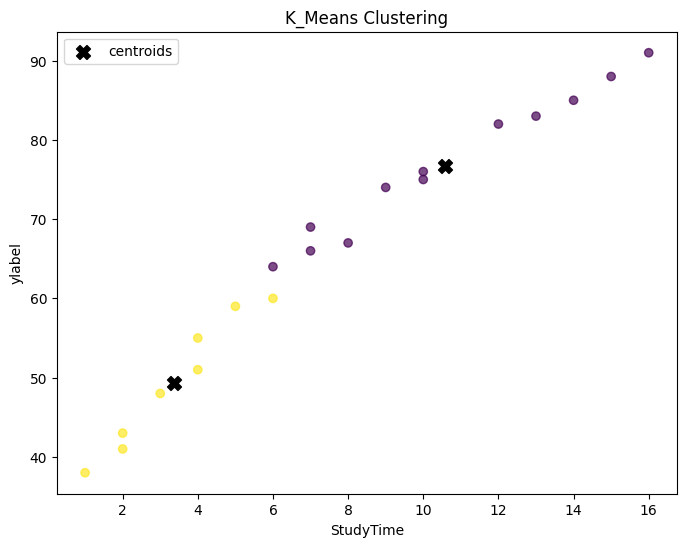

In [ ]:
plt.figure(figsize= (8,6))
plt.scatter(df_for_clustering['StudyTime'] , df_for_clustering['FinalExamScore'] , c = cluster_labels,
            cmap = 'viridis',alpha = 0.7)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c = 'black' , marker = 'X' , s = 100 , label = 'centroids')
plt.xlabel('StudyTime')
plt.ylabel('ylabel')
plt.title('K_Means Clustering')
plt.legend()
plt.show()